In [1]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
import math
from scipy.integrate import quad

In [5]:
def eval_legendre(x,n):
    
    phi_0 = 1
    phi_1 = x
    
    
    poly = [1, x]
    for i in range(1,n):
        phi_n1 = (1/(i+1))*((2*i+1)*x*phi_1 - i*phi_0)
        poly.append(phi_n1)
        phi_0 = phi_1
        phi_1 = phi_n1
  
    return poly
        
        

In [7]:
eval_legendre(2,2)

[1, 2, 5.5]

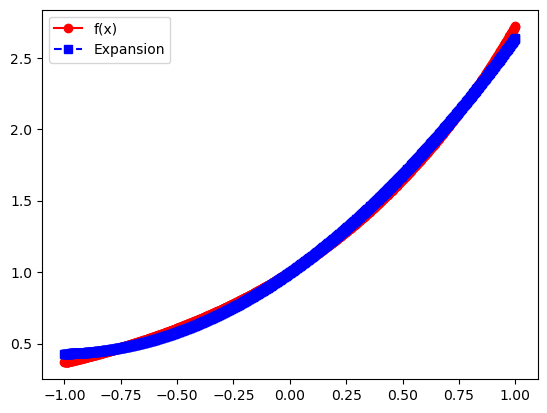

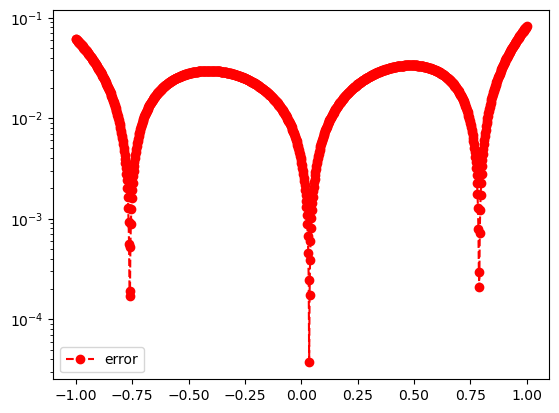

In [6]:
def driver():

#  function you want to approximate
    f = lambda x: math.exp(x)

# Interval of interest    
    a = -1
    b = 1
# weight function    
    w = lambda x: 1.

# order of approximation
    n = 2

#  Number of points you want to sample in [a,b]
    N = 999
    xeval = np.linspace(a,b,N+1)
    
    pval = np.zeros(N+1)
    for kk in range(N+1):
        #print(xeval[kk])
        pval[kk] = eval_legendre_expansion(f,a,b,w,n,xeval[kk])

      
    ''' create vector with exact values'''
    fex = np.zeros(N+1)
    for kk in range(N+1):
        fex[kk] = f(xeval[kk])
        
    plt.figure()    
    plt.plot(xeval,fex,'ro-', label= 'f(x)')
    plt.plot(xeval,pval,'bs--',label= 'Expansion') 
    plt.legend()
    plt.show()    
    
    err = abs(pval-fex)
    plt.semilogy(xeval,err,'ro--',label='error')
    plt.legend()
    plt.show()
    
      

    
def eval_legendre_expansion(f,a,b,w,n,x): 

#   This subroutine evaluates the Legendre expansion

#  Evaluate all the Legendre polynomials at x that are needed
# by calling your code from prelab 
    p = eval_legendre(x, n)
    # initialize the sum to 0 
    pval = 0.0
    for j in range(0,n+1):
        # make a function handle for evaluating phi_j(x)
        phi_j = lambda x: eval_legendre(x, n)[j]
        # make a function handle for evaluating phi_j^2(x)*w(x)
        phi_j_sq = lambda x: phi_j(x)**2
        # use the quad function from scipy to evaluate normalizations
        norm_fac,err = quad(phi_j_sq, a, b)
        # make a function handle for phi_j(x)*f(x)*w(x)/norm_fac
        func_j = lambda x: phi_j(x)*f(x)*w(x)/norm_fac
        # use the quad function from scipy to evaluate coeffs
        aj,err = quad(func_j, a, b)
        # accumulate into pval
        pval += aj*phi_j(x)


    return pval

driver()

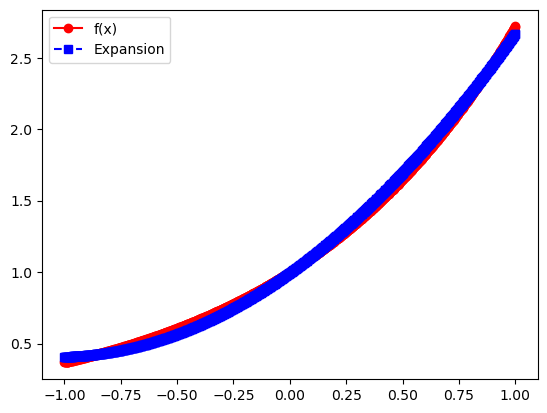

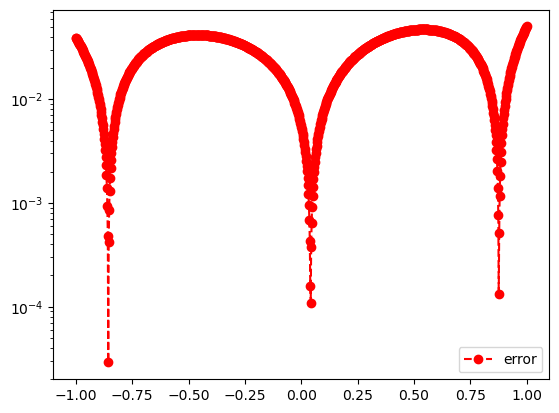

In [19]:
def eval_Cheb(x,n):
    
    T_0 = 1
    T_1 = x
    
    
    poly = [1, x]
    for i in range(1,n):
        Tn1 = 2*x*T_1 - T_0
        poly.append(Tn1)
        T_0 = T_1
        T_1 = Tn1
  
    return poly

eval_Cheb(2,2)

def driver1():

#  function you want to approximate
    f = lambda x: math.exp(x)

# Interval of interest    
    a = -1
    b = 1
# weight function    
    w = lambda x: 1/np.sqrt(1-x**2)

# order of approximation
    n = 2

#  Number of points you want to sample in [a,b]
    N = 1000
    xeval = np.linspace(a,b,N+1)
    
    pval = np.zeros(N+1)
    for kk in range(N+1):
        #print(xeval[kk])
        pval[kk] = eval_Cheb_expansion(f,a,b,w,n,xeval[kk])

      
    ''' create vector with exact values'''
    fex = np.zeros(N+1)
    for kk in range(N+1):
        fex[kk] = f(xeval[kk])
        
    plt.figure()    
    plt.plot(xeval,fex,'ro-', label= 'f(x)')
    plt.plot(xeval,pval,'bs--',label= 'Expansion') 
    plt.legend()
    plt.show()    
    
    err = abs(pval-fex)
    plt.semilogy(xeval,err,'ro--',label='error')
    plt.legend()
    plt.show()
    
def eval_Cheb_expansion(f,a,b,w,n,x): 

#   This subroutine evaluates the Legendre expansion

#  Evaluate all the Legendre polynomials at x that are needed
# by calling your code from prelab 
    p = eval_Cheb(x,n)
    # initialize the sum to 0 
    pval = 0.0
    for j in range(0,n+1):
        # make a function handle for evaluating phi_j(x)
        phi_j = lambda x: eval_Cheb(x, n)[j]
        # make a function handle for evaluating phi_j^2(x)*w(x)
        phi_j_sq = lambda x: phi_j(x)**2*w(x)
        # use the quad function from scipy to evaluate normalizations
        norm_fac,err = quad(phi_j_sq, a, b)
        # make a function handle for phi_j(x)*f(x)*w(x)/norm_fac
        func_j = lambda x: phi_j(x)*f(x)*w(x)/norm_fac
        # use the quad function from scipy to evaluate coeffs
        aj,err = quad(func_j, a, b)
        # accumulate into pval
        pval += aj*phi_j(x)


    return pval


    
driver1()